# Isolation Forest

## data preparation


### import data

In [49]:
import pandas as pd

logs_raw = pd.read_json('data/logs.json')
logs_raw.head()


,timestamp,action,httpRequest,host
0,211256,ALLOW,"{'clientIp': '172.6.20.69', 'country': 'PH', '...",www.f81C.de
1,248639,ALLOW,"{'clientIp': '13.181.79.103', 'country': 'PH',...",www.Ip8n.de
2,152940,ALLOW,"{'clientIp': '168.199.225.84', 'country': 'PH'...",www.WN9V.de
3,147516,ALLOW,"{'clientIp': '127.199.221.38', 'country': 'PH'...",www.J6Nj.de
4,149819,ALLOW,"{'clientIp': '34.77.119.65', 'country': 'PH', ...",www.NoE6.de


### normalize and aggregate

In [50]:
# Auflösen der 'data'-Spalte
normalized_df = pd.json_normalize(logs_raw['httpRequest'])

# Zusammenführen mit der ursprünglichen ID
logs = pd.concat([logs_raw, normalized_df], axis=1)
logs.drop(['httpRequest'], axis=1, inplace=True)
logs.head()

,timestamp,action,host,clientIp,country,uri
0,211256,ALLOW,www.f81C.de,172.6.20.69,PH,/placeholder
1,248639,ALLOW,www.Ip8n.de,13.181.79.103,PH,/placeholder
2,152940,ALLOW,www.WN9V.de,168.199.225.84,PH,/placeholder
3,147516,ALLOW,www.J6Nj.de,127.199.221.38,PH,/placeholder
4,149819,ALLOW,www.NoE6.de,34.77.119.65,PH,/placeholder


In [115]:
# Gruppieren nach clientIp und Zählen der Aufrufe
grouped_logs = logs.groupby('clientIp').agg({
    'host': 'first',           # Wähle den ersten Host (oder verwende einen anderen Ansatz)
    'clientIp': 'count'        # Zähle die Anzahl der Zeilen pro clientIp
}).rename(columns={'clientIp': 'call_count'})

# Reset index für ein ordentliches DataFrame
grouped_logs = grouped_logs.reset_index()
grouped_logs.head()

[['100.106.22.152' 'www.UDsx.de' 3]
 ['104.215.18.178' 'www.qyEP.de' 41]
 ['110.193.215.48' 'www.UDsx.de' 28]
 ['110.251.240.42' 'www.NoE6.de' 5]
 ['115.147.226.201' 'www.qyEP.de' 49]
 ['115.239.140.6' 'www.qyEP.de' 10]
 ['118.224.87.137' 'www.J6Nj.de' 14]
 ['118.45.72.40' 'www.UDsx.de' 45]
 ['120.6.48.216' 'www.f81C.de' 48]
 ['121.251.102.152' 'www.J6Nj.de' 31]
 ['122.164.48.164' 'www.xOTw.de' 34]
 ['123.215.134.210' 'www.J6Nj.de' 42]
 ['124.225.243.14' 'www.Ip8n.de' 7]
 ['127.199.221.38' 'www.J6Nj.de' 19]
 ['128.108.175.60' 'www.44LC.de' 49]
 ['13.181.79.103' 'www.Ip8n.de' 50]
 ['13.184.122.91' 'www.44LC.de' 42]
 ['131.27.209.217' 'www.NoE6.de' 19]
 ['131.85.76.190' 'www.CLFs.de' 25]
 ['137.147.206.112' 'www.qyEP.de' 30]
 ['137.207.159.71' 'www.NoE6.de' 24]
 ['145.189.184.225' 'www.Ip8n.de' 1]
 ['146.203.118.202' 'www.NoE6.de' 15]
 ['148.141.30.168' 'www.qyEP.de' 20]
 ['149.35.45.199' 'www.Ip8n.de' 36]
 ['152.129.18.101' 'www.Ip8n.de' 36]
 ['152.30.228.100' 'www.WN9V.de' 30]
 ['153.7

## plotting

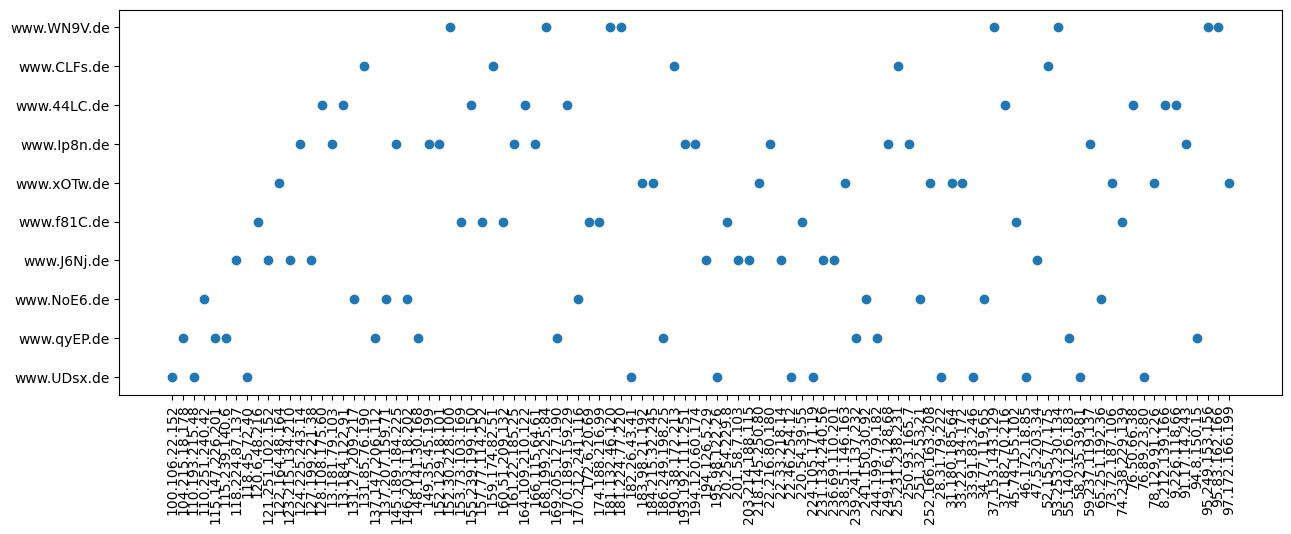

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

#plt.scatter(grouped_logs['clientIp'], grouped_logs['timestamp'])
plt.scatter(grouped_logs['clientIp'], grouped_logs['host'])
plt.xticks(rotation=90)
plt.show()

### amount / client on a specific host

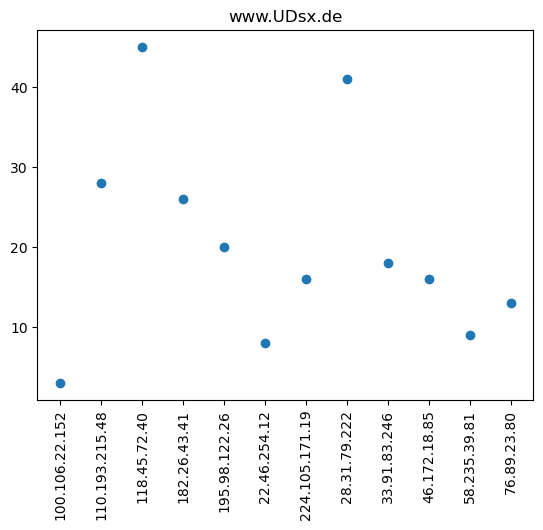

In [119]:
single_host = grouped_logs[grouped_logs['host'] == 'www.UDsx.de']

#plt.figure(figsize=(10, 7))

plt.title('www.UDsx.de')
plt.scatter(single_host['clientIp'], single_host['call_count'])
#plt.hist(single_host['clientIp'], bins=50)
plt.xticks(rotation=90)
plt.show()

          clientIp         host  call_count
0   100.106.22.152  www.UDsx.de           3
2   110.193.215.48  www.UDsx.de          28
7     118.45.72.40  www.UDsx.de          45
43    182.26.43.41  www.UDsx.de          26
51   195.98.122.26  www.UDsx.de          20
58    22.46.254.12  www.UDsx.de           8
60  224.105.171.19  www.UDsx.de          16
72    28.31.79.222  www.UDsx.de          41
75    33.91.83.246  www.UDsx.de          18
80    46.172.18.85  www.UDsx.de          16
85    58.235.39.81  www.UDsx.de           9
91     76.89.23.80  www.UDsx.de          13
           clientIp         host  call_count
1    104.215.18.178  www.qyEP.de          41
4   115.147.226.201  www.qyEP.de          49
5     115.239.140.6  www.qyEP.de          10
19  137.147.206.112  www.qyEP.de          30
23   148.141.30.168  www.qyEP.de          20
36  169.205.127.190  www.qyEP.de          27
46   186.249.198.25  www.qyEP.de           6
64  239.241.137.232  www.qyEP.de          32
66   244.199.79.182  ww

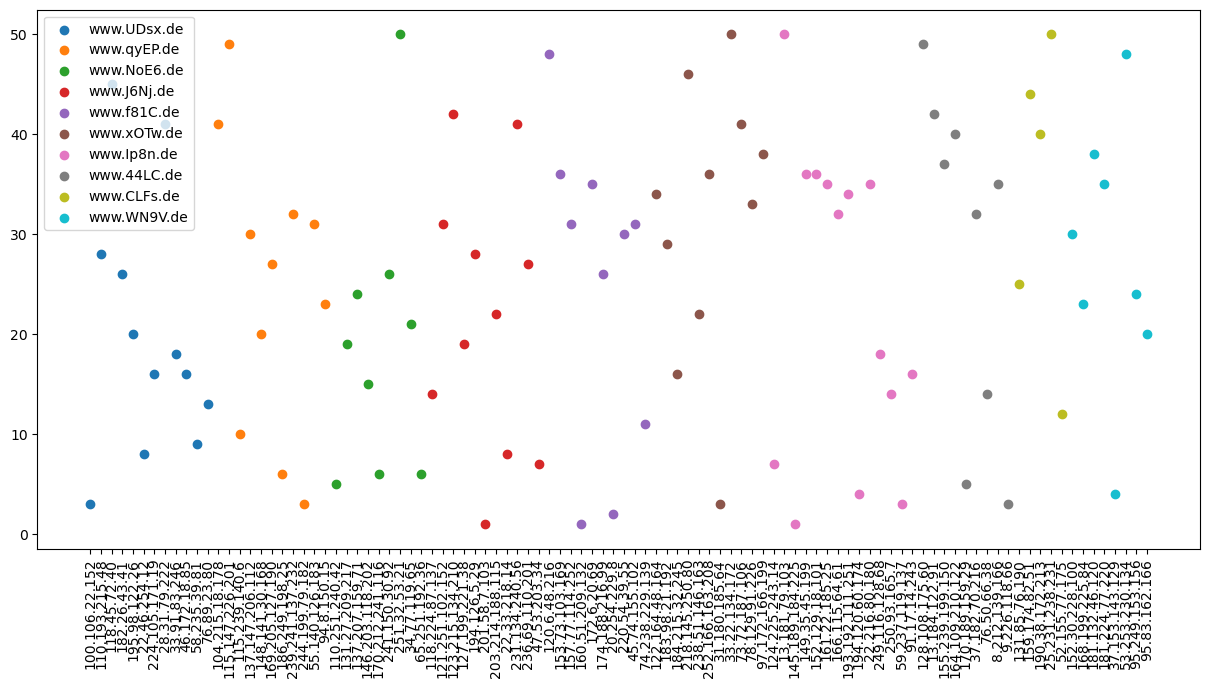

In [113]:
plt.figure(figsize=(15, 7))

hosts = grouped_logs['host'].unique()

for host in hosts:
    sh = grouped_logs[grouped_logs['host'] == host]
    print(sh)
    plt.scatter(sh['clientIp'], sh['call_count'], label=host)

plt.xticks(rotation=90)
#plt.axvline(x=42, color='black', linestyle='--')
plt.legend()  
plt.show()

### amount / host on one client ip

In [60]:
host_ip_counts = logs.groupby(['host', 'clientIp']).size().reset_index(name='call_count')
host_ip_counts

,host,clientIp,call_count
0,www.44LC.de,104.215.18.178,2
1,www.44LC.de,110.193.215.48,2
2,www.44LC.de,115.147.226.201,5
3,www.44LC.de,118.224.87.137,3
4,www.44LC.de,118.45.72.40,7
...,...,...,...
800,www.xOTw.de,78.129.91.226,4
801,www.xOTw.de,8.212.139.166,2
802,www.xOTw.de,94.8.150.15,1
803,www.xOTw.de,95.249.153.156,3


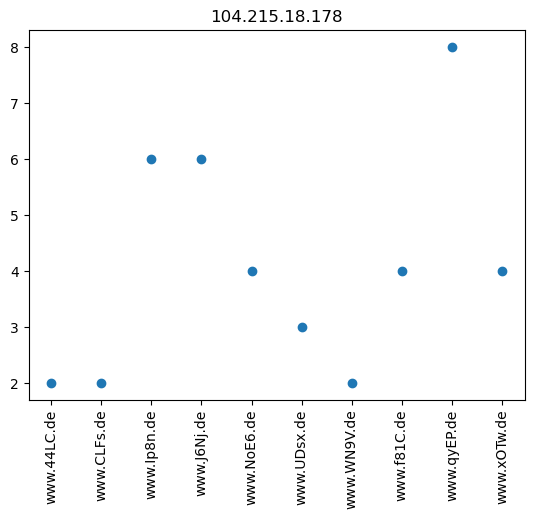

In [99]:
#plt.figure(figsize=(15, 7))

single_ip = host_ip_counts[host_ip_counts['clientIp'] == '104.215.18.178']

plt.title('104.215.18.178')
plt.scatter(single_ip['host'], single_ip['call_count'])
plt.xticks(rotation=90)
plt.show()

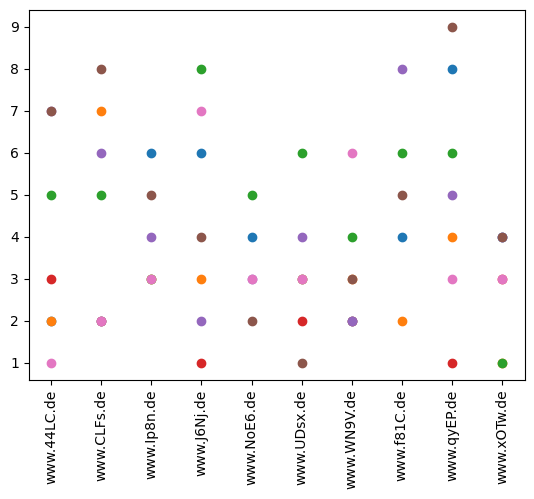

In [107]:
#plt.figure(figsize=(15, 7))

client_ips = host_ip_counts['clientIp'].unique()

counter = 0

for ip in client_ips:
    counter += 1
    si = host_ip_counts[host_ip_counts['clientIp'] == ip]
    plt.scatter(si['host'], si['call_count'], label=ip)
    
    if counter > 6:
        break

#plt.legend()
plt.xticks(rotation=90)
plt.show()